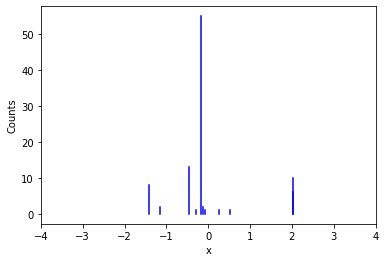

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# parameters of the DP
alpha, H = 2, norm()

def restaurant_seating(n=100):
    # initially our restaurant is empy
    theta = {}

    # 1st customer
    table = H.rvs() 
    theta[table] = 1

    # (k+1)th customer
    for k in np.arange(1, n): 
        u = np.random.uniform()
        
        if u<alpha/(alpha+k):   # pick a new table 
            table = H.rvs() 
            theta[table] = 1
                        
        else:                   # sit with friends 
            occupied_tables = list(theta.keys())
            
            probabilities = np.array(list(theta.values()))
            probabilities = probabilities/np.sum(list(theta.values()))
            
            table = np.random.choice(occupied_tables, 
                                     p=probabilities)
            
            theta[table] += 1
        
    return theta

theta = restaurant_seating()

for k, v in theta.items():
    plt.plot([k,k], [0,v], 'b-')
plt.xlabel("x"); plt.ylabel("Counts"); plt.xlim(-4,4);